In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None

## Import data 
- Here we have Ni and Cu contents in Petrolog, although really, they should be solved iteratively as demonstrated in the sulfide fractionation example

In [7]:
df_out=ss.import_data('PetrologCalculations.xlsx', Petrolog=True)
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Fe2O3_Liq,FeO_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,49.9010,0.9981,14.9715,8.981890,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,0.0,0.098586,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.9839,8.0964,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,49.9978,1.0081,15.1220,8.952251,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,0.0,0.097947,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.9743,8.0754,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,50.0982,1.0185,15.2770,8.917591,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,0.0,0.097380,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.9649,8.0492,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1
3,50.2003,1.0289,15.4337,8.878271,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,0.0,0.096919,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.9561,8.0178,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1
4,50.3062,1.0397,15.5950,8.832931,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,0.0,0.096540,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.9475,7.9802,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1


## Calculate SCSS using Smythe

In [3]:
Smythe_CalcSulf=ss.calculate_Smythe2017_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=df_out['Fe3Fet_Liq'], Ni_Liq=df_out['Ni_Liq_ppm'], Cu_Liq=df_out['Cu_Liq_ppm'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,T_K,P_kbar
0,1163.723704,317.894143,1526.431,1,0.65,0.098586,0.458757,0.006900,0.162216,0.136727,...,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1526.431,1
1,1132.276539,309.303728,1516.580,1,0.65,0.097947,0.460124,0.006977,0.164017,0.131794,...,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,1516.580,1
2,1099.610160,300.380260,1506.214,1,0.65,0.097380,0.461536,0.007056,0.165873,0.126735,...,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,1506.214,1
3,1066.362543,291.298016,1495.511,1,0.65,0.096919,0.462964,0.007136,0.167751,0.121654,...,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,1495.511,1
4,1031.815959,281.860934,1484.230,1,0.65,0.096540,0.464439,0.007218,0.169687,0.116453,...,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,1484.230,1


Text(0.5, 0, 'FeO$_{T}$ Liq (Wt%)')

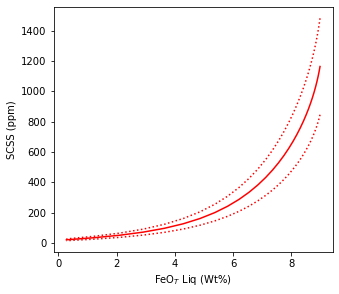

In [4]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4.5), sharey=True)
ax1.plot(Smythe_CalcSulf['FeOt_Liq'], Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax1.plot(Smythe_CalcSulf['FeOt_Liq'], 
         Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.plot(Smythe_CalcSulf['FeOt_Liq'], 
         Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_CalcSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')